# Set Up

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_train = pd.read_csv(r'train.csv')
df_test = pd.read_csv(r'test.csv')

In [ ]:
print('Train data shape:',df_train.shape)
print('Test data shape:',df_test.shape)

Train data shape: (188318, 132)
Test data shape: (125546, 131)


In [ ]:
df_train.head(5)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [ ]:
df_train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


# Exploratory Data Analysis

In [ ]:
print('Duplicated value in train data: ',df_train['id'].duplicated().sum().sum())
print('Duplicated value in test data: ',df_test['id'].duplicated().sum().sum())

Duplicated value in train data:  0
Duplicated value in test data:  0


In [ ]:
print('Missing value in train data: ',df_train.isnull().sum().sum())
print('Missing value in test data: ',df_test.isnull().sum().sum())

Missing value in train data:  0
Missing value in test data:  0


## Target Variable

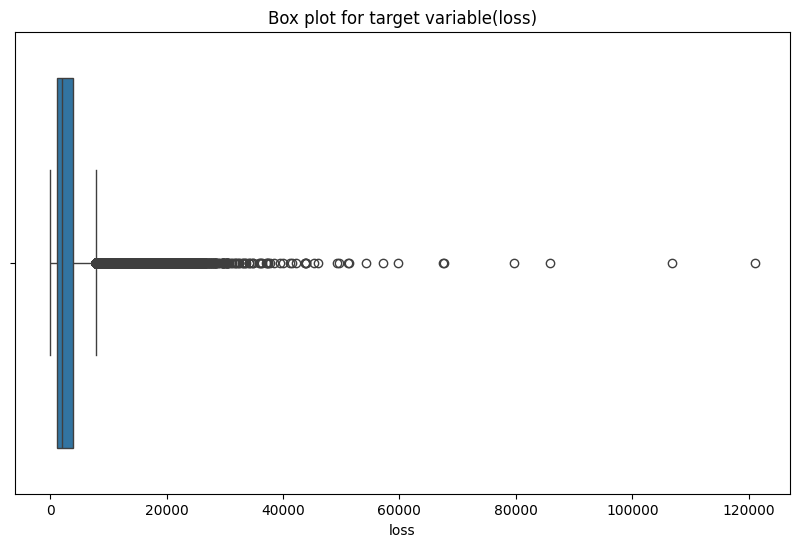

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df_train["loss"],orient='h')
plt.title('Box plot for target variable(loss)')
plt.show()

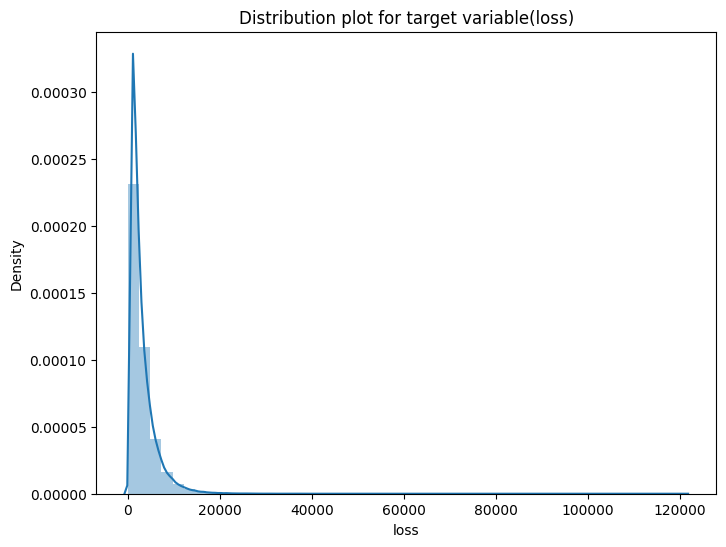

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df_train['loss'])
plt.ylabel('Density')
plt.title('Distribution plot for target variable(loss)')
plt.show()

In [ ]:
print('Skewness of Target Variable:',df_train['loss'].skew())

Skewness of Target Variable: 3.7949583775378604


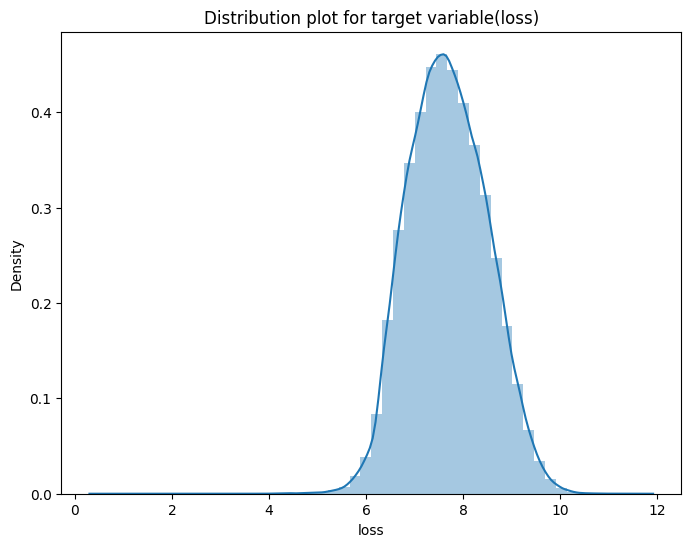

In [ ]:
#log1p function applies log(1+x) to all elements of the column
df_train["loss"] = np.log1p(df_train["loss"])

plt.figure(figsize=(8,6))
sns.distplot(df_train['loss'])
plt.ylabel('Density')
plt.title('Distribution plot for target variable(loss)');

In [ ]:
print('Skewness of Target Variable:',df_train['loss'].skew())

Skewness of Target Variable: 0.09661958950315053


## Continuous Categories

In [ ]:
counts_categorical = []
cont_features = []
cat_features = []
for i in df_train.columns: # counting the number of categorical and continous features
    if 'cat' in i:
        #categorical_features_count += 1
        counts_categorical.append(len(df_train[i].value_counts()))  # counting the number of classes for each variable
        cat_features.append(i)
    elif 'cont' in i:
        #continous_features_count += 1
        cont_features.append(i)

print('Total categorical features:', len(cat_features))
print('Total continuous features:', len(cont_features))

Total categorical features: 116
Total continuous features: 14


<Axes: >

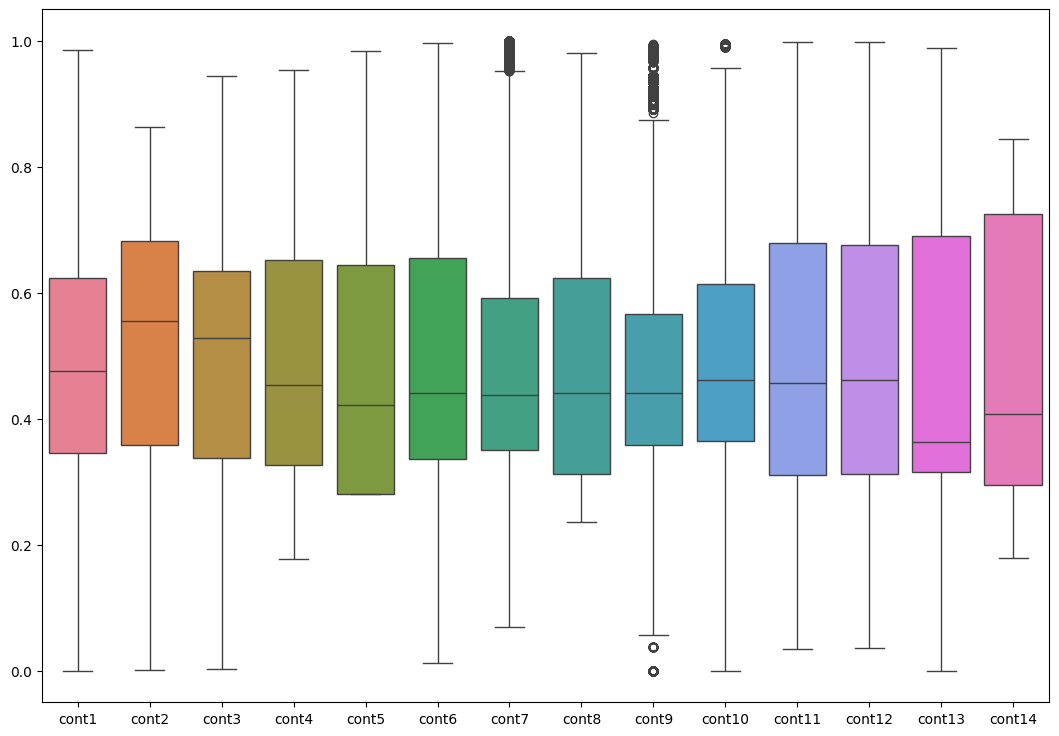

In [ ]:
plt.figure(figsize=(13,9))
sns.boxplot(df_train[cont_features])

In [ ]:
for i in cont_features:
  print('Skewness of',i,':',df_train[i].skew())

Skewness of cont1 : 0.5164240212162501
Skewness of cont2 : -0.31094125136830164
Skewness of cont3 : -0.010002283912087023
Skewness of cont4 : 0.4160960294956771
Skewness of cont5 : 0.6816224364137882
Skewness of cont6 : 0.4612142679626868
Skewness of cont7 : 0.8260528331279865
Skewness of cont8 : 0.6766340713246526
Skewness of cont9 : 1.072428719811583
Skewness of cont10 : 0.35500094742512944
Skewness of cont11 : 0.28082142843754276
Skewness of cont12 : 0.2919920804036288
Skewness of cont13 : 0.3807422004805747
Skewness of cont14 : 0.24867408719289721


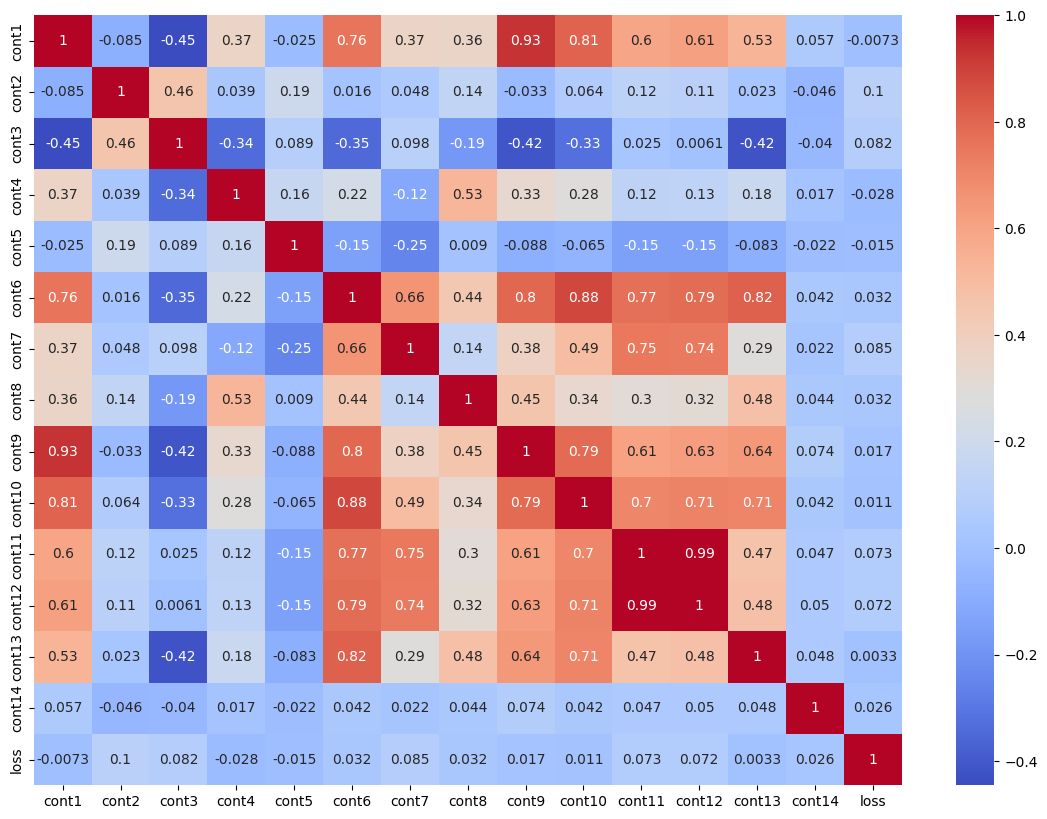

In [ ]:
numeric_columns = df_train.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(14,10))
corr_matrix = df_train[numeric_columns].drop(['id'],axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm");

các cột định lượng có tương quan tốt với nhau:
- Cont1 - Cont9
- Cont6 - Cont10
- Cont11 - Cont12

## Categorical Categories

Text(0.5, 1.0, 'Distribution of categorical features for number of classes')

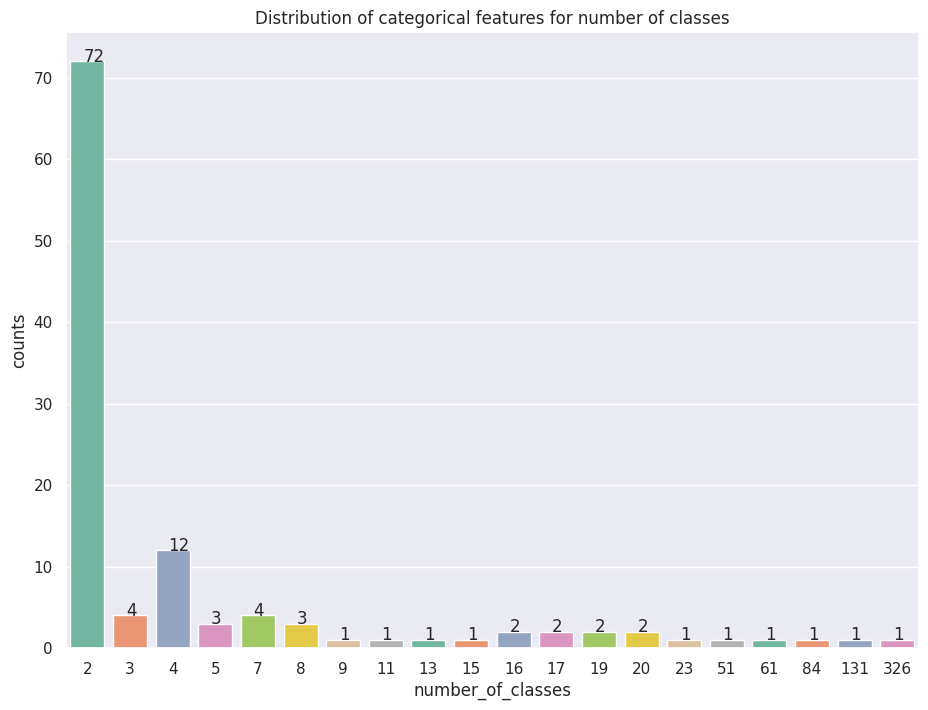

In [ ]:
#ref : https://stackoverflow.com/a/59840744/5305748 for anotating bargraph
from collections import Counter
k = Counter(counts_categorical)
k = dict(k)
k = pd.DataFrame({'number_of_classes':list(k.keys()),'counts': list(k.values()) })
sns.set(rc={'figure.figsize':(11.0,8.0)})
g = sns.barplot(x= 'number_of_classes', y='counts',data=k,palette='Set2')

for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))

plt.title("Distribution of categorical features for number of classes")

In [ ]:
# Xem các giá trị unique của từng cột cat
for col in cat_features:
  print('Number of unique in {}:'.format(col),len(df_train[col].unique()))
  print(df_train[col].unique())
  print('-'*20)

Number of unique in cat1: 2
['A' 'B']
--------------------
Number of unique in cat2: 2
['B' 'A']
--------------------
Number of unique in cat3: 2
['A' 'B']
--------------------
Number of unique in cat4: 2
['B' 'A']
--------------------
Number of unique in cat5: 2
['A' 'B']
--------------------
Number of unique in cat6: 2
['A' 'B']
--------------------
Number of unique in cat7: 2
['A' 'B']
--------------------
Number of unique in cat8: 2
['A' 'B']
--------------------
Number of unique in cat9: 2
['B' 'A']
--------------------
Number of unique in cat10: 2
['A' 'B']
--------------------
Number of unique in cat11: 2
['B' 'A']
--------------------
Number of unique in cat12: 2
['A' 'B']
--------------------
Number of unique in cat13: 2
['A' 'B']
--------------------
Number of unique in cat14: 2
['A' 'B']
--------------------
Number of unique in cat15: 2
['A' 'B']
--------------------
Number of unique in cat16: 2
['A' 'B']
--------------------
Number of unique in cat17: 2
['A' 'B']
----------

- Từ cột cat1 tới cat72 số lượng giá trị unique là: 2
- Từ cột cat73 tới cat76 số lượng giá trị unique là: 3
- Từ cột cat77 tới cat88 số lượng giá trị unique là: 4
- Một số cột có số lượng kí tự chữ cái trong các giá trị > 1 như cột cat109, cat110, cat112, cat113, cat116
- đây đều là những cột có số lượng giá trị Unique nhiều hơn hẳn so với các cột còn lại (chỉ nằm trong số lượng bảng chữ cái)

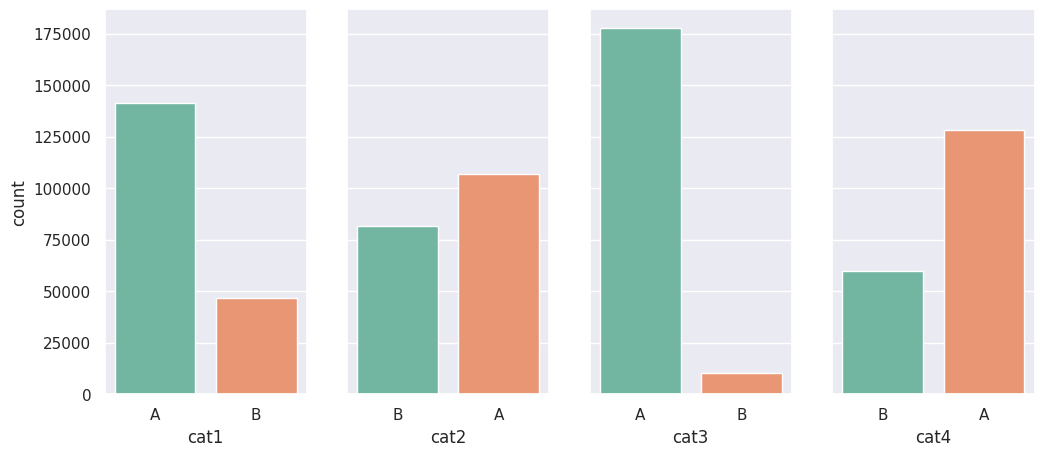

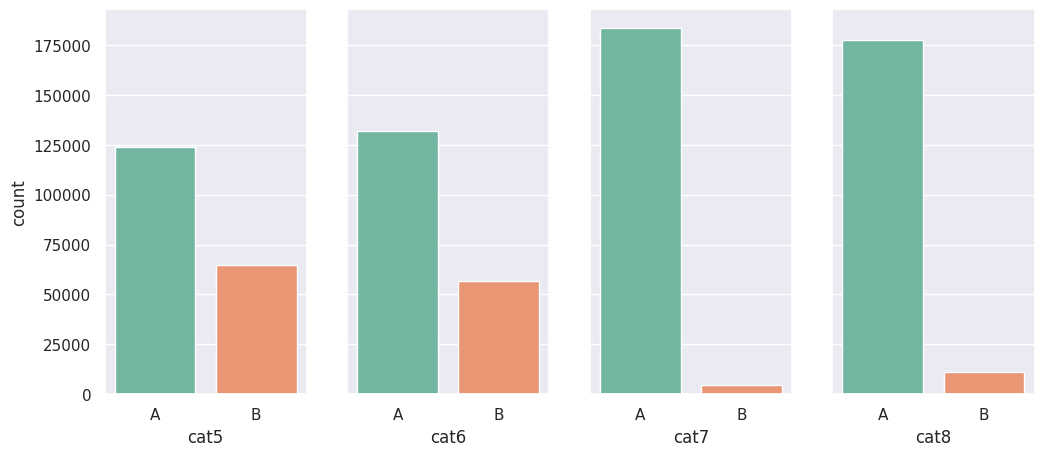

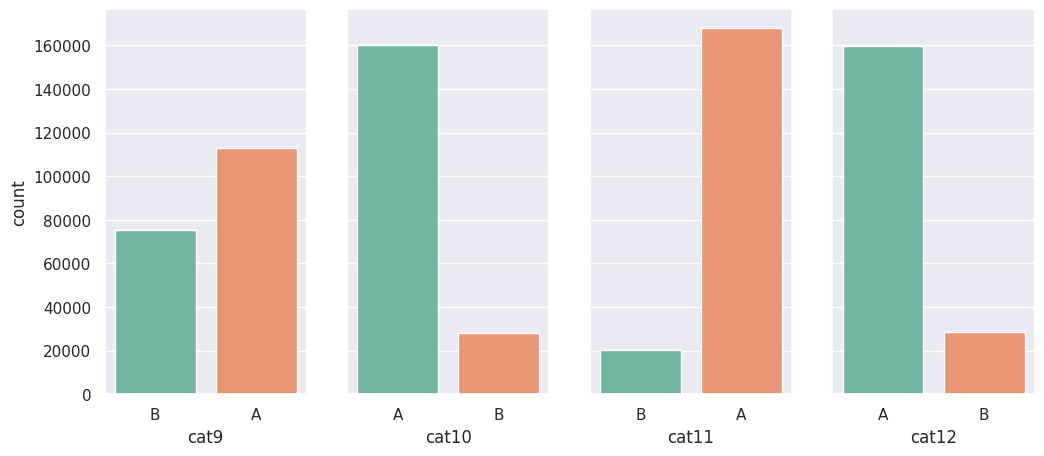

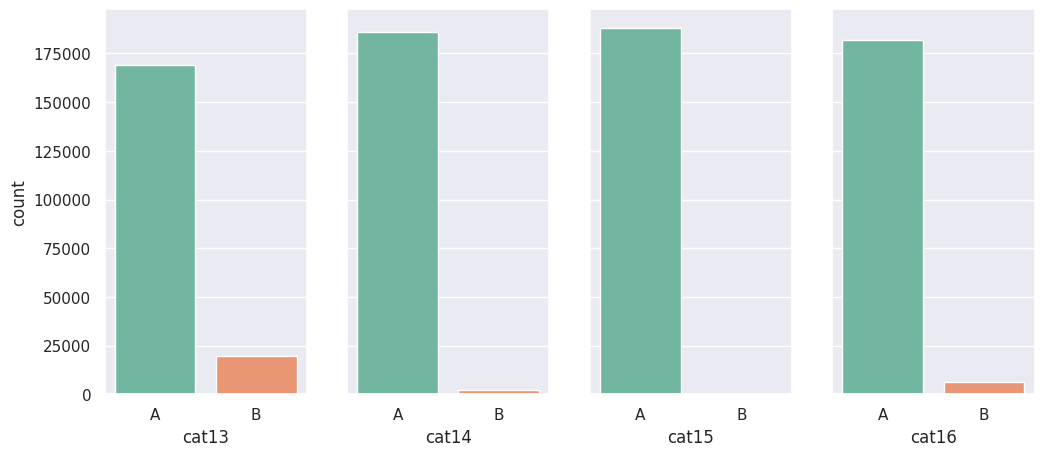

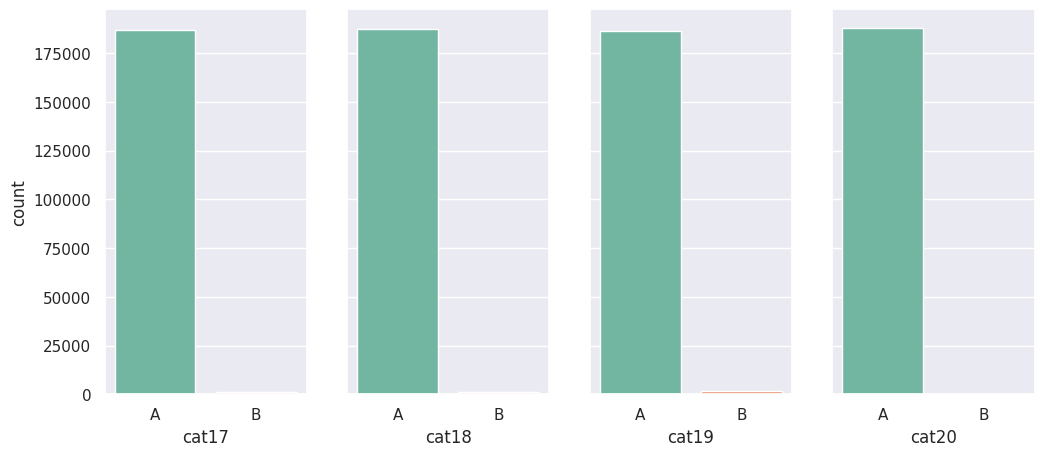

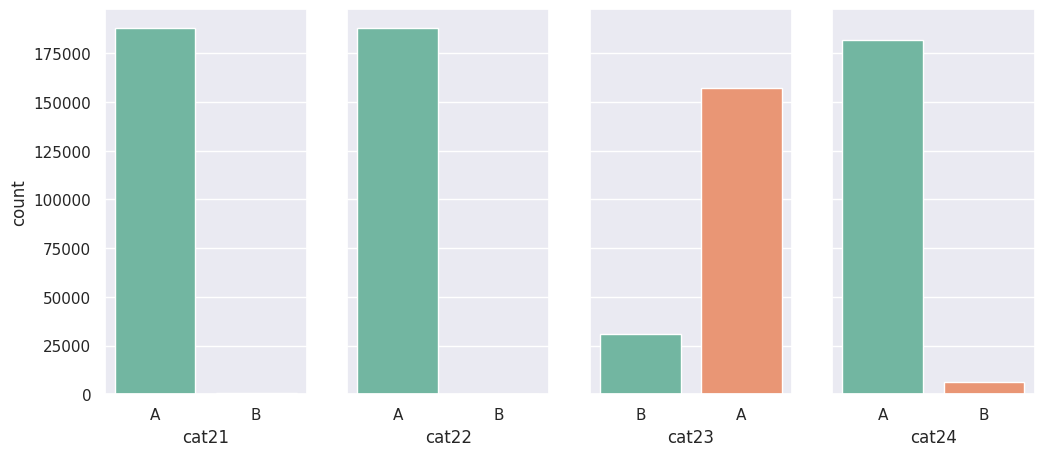

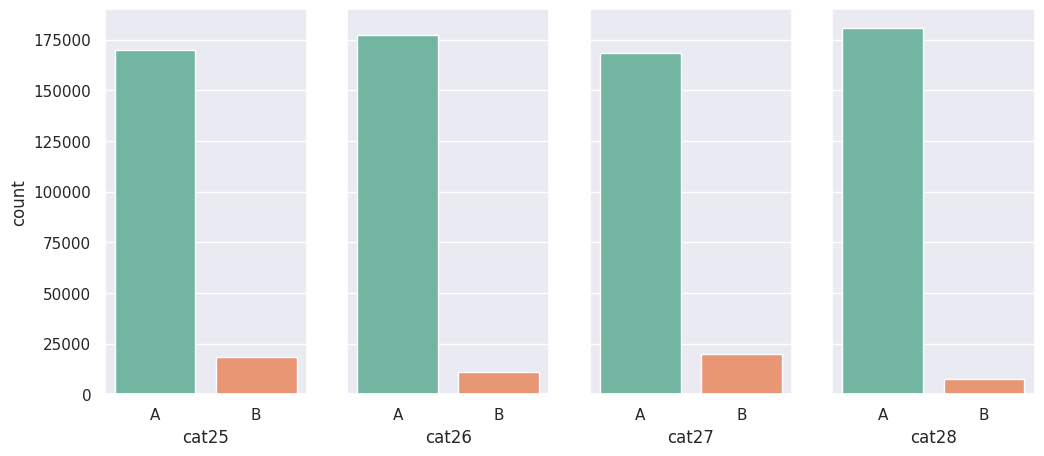

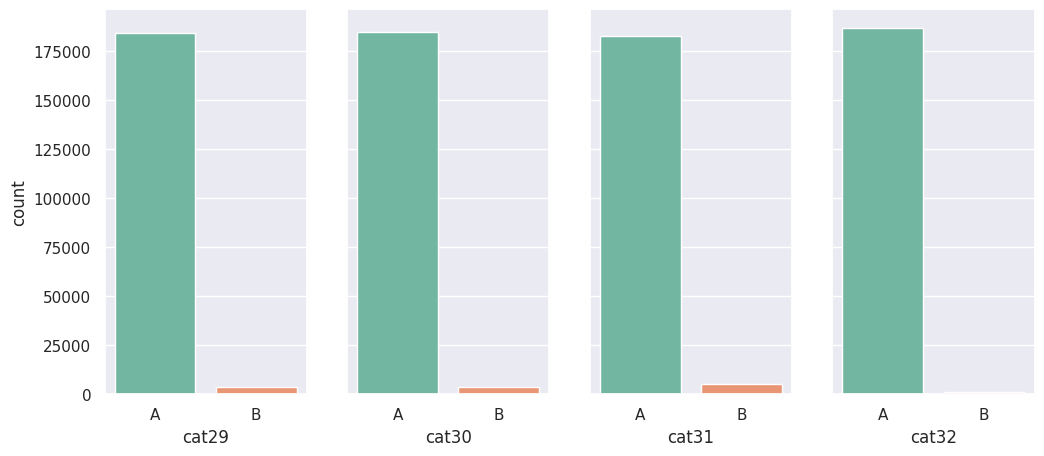

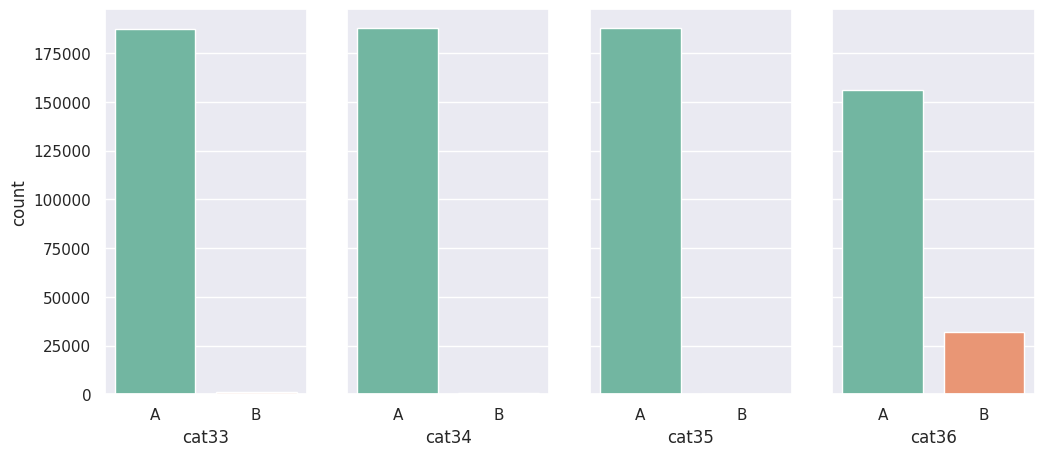

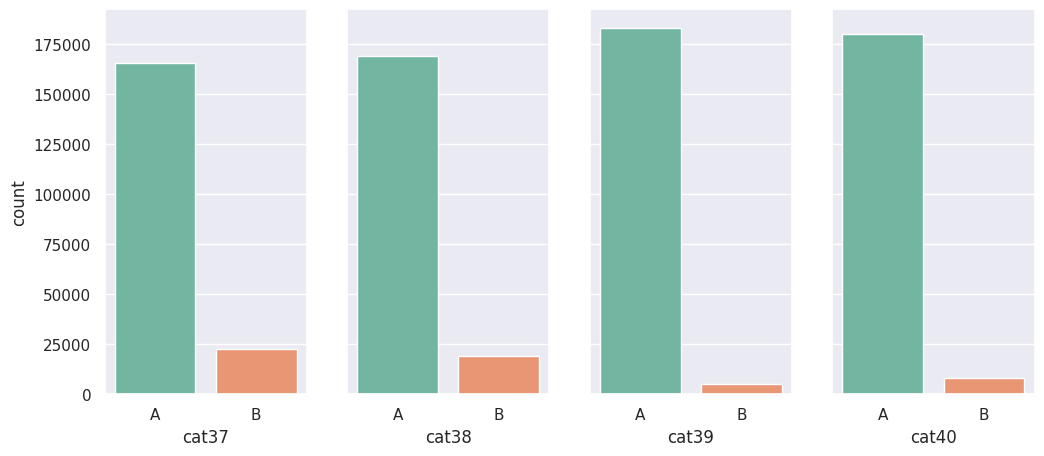

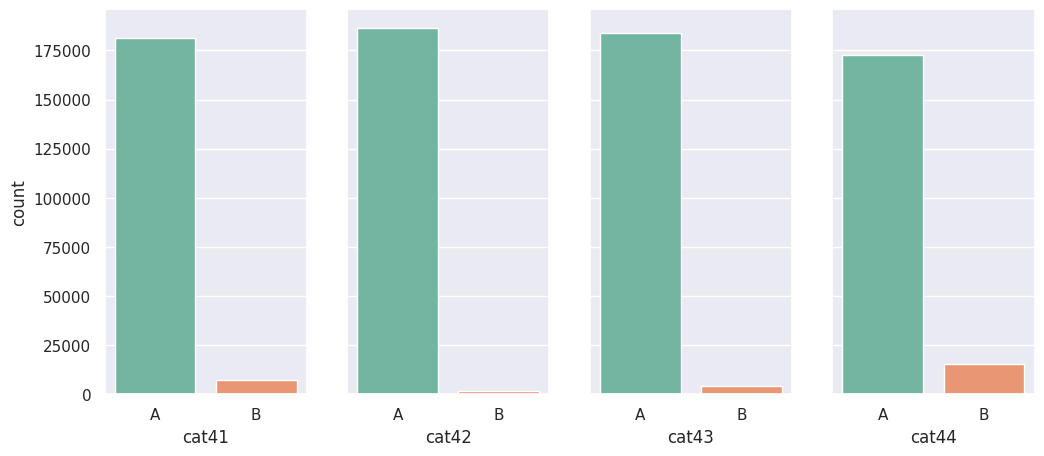

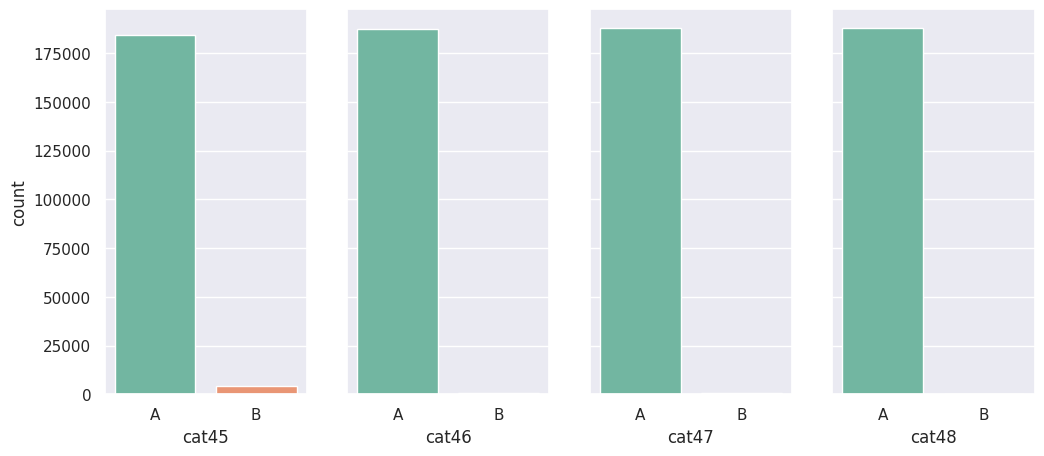

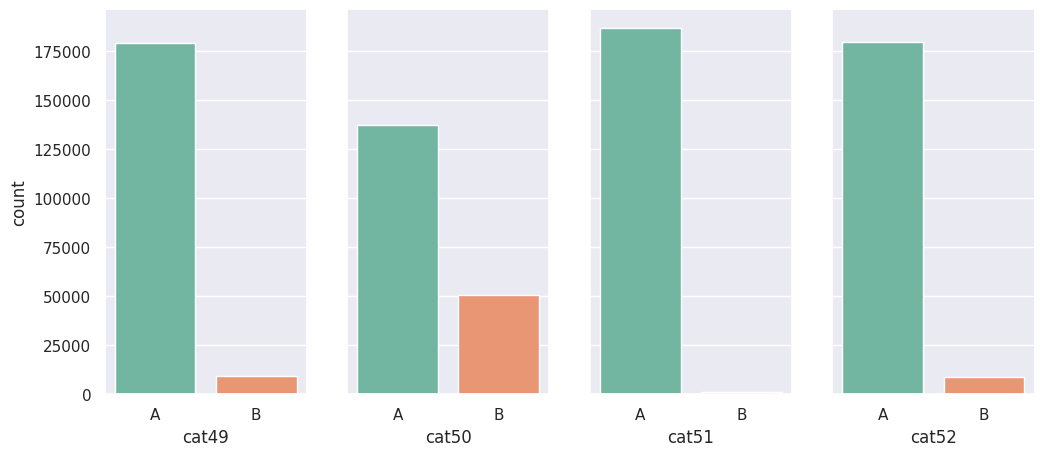

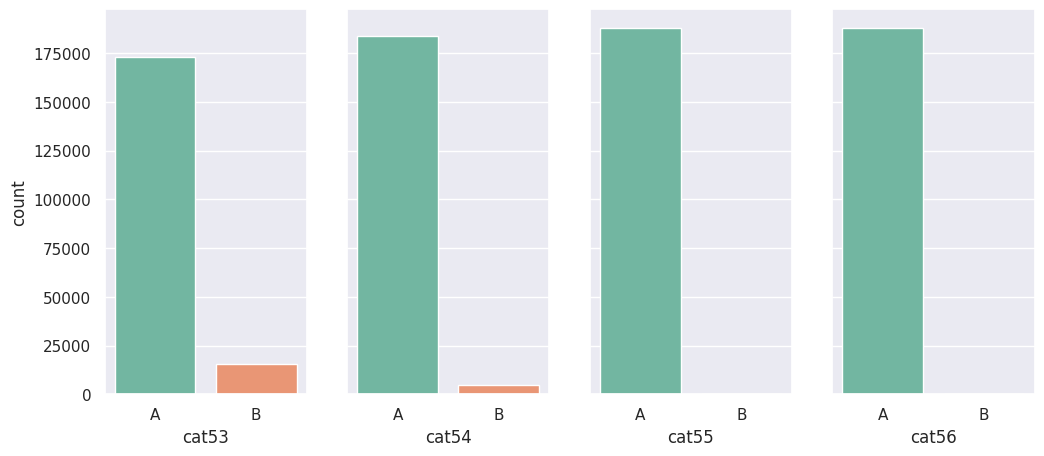

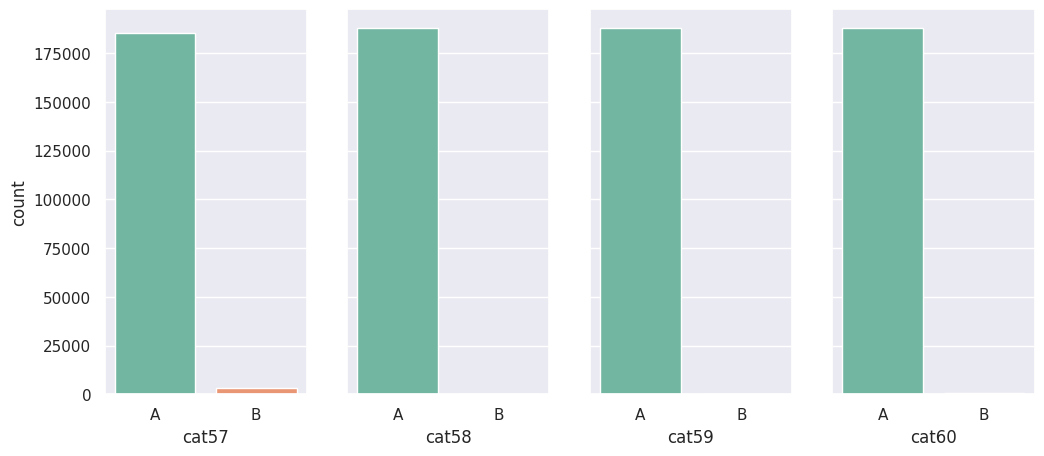

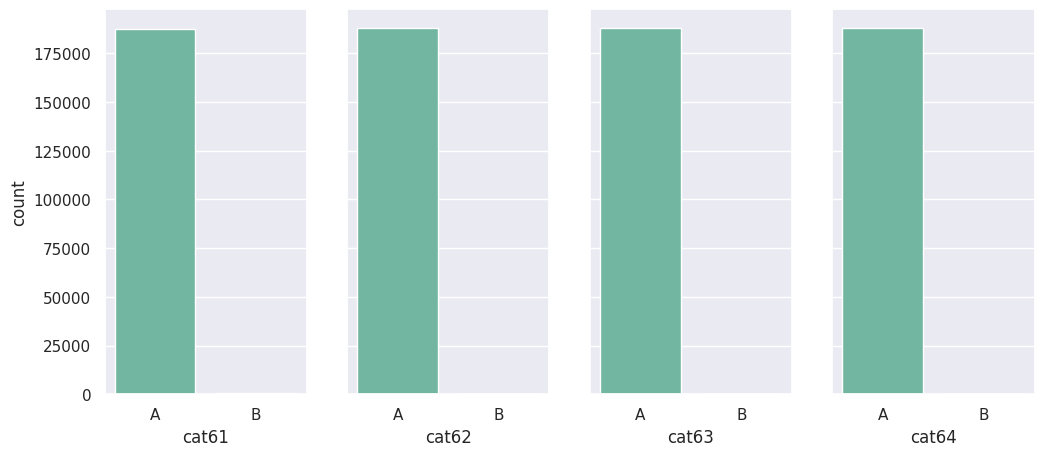

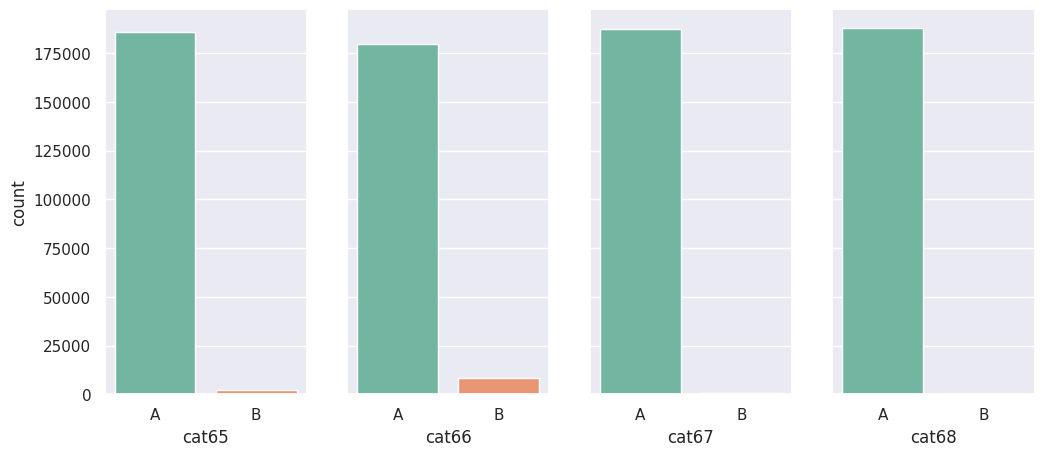

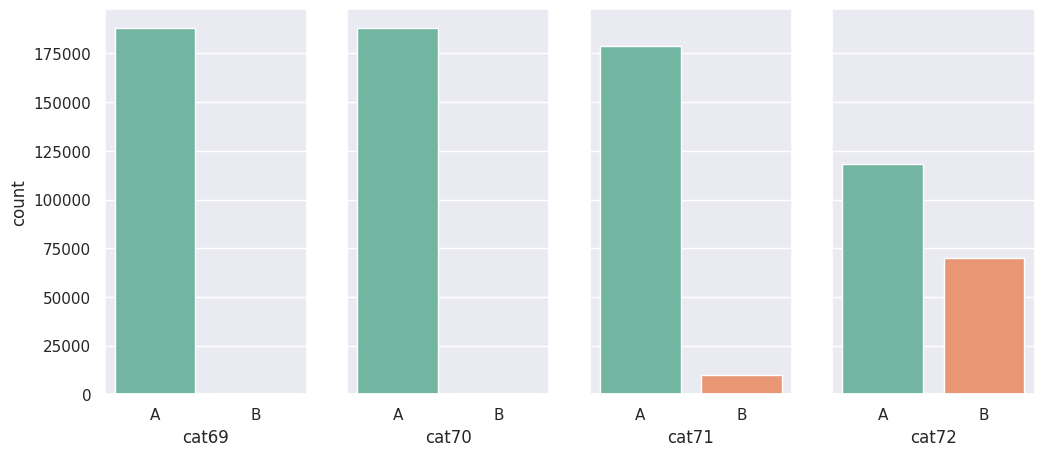

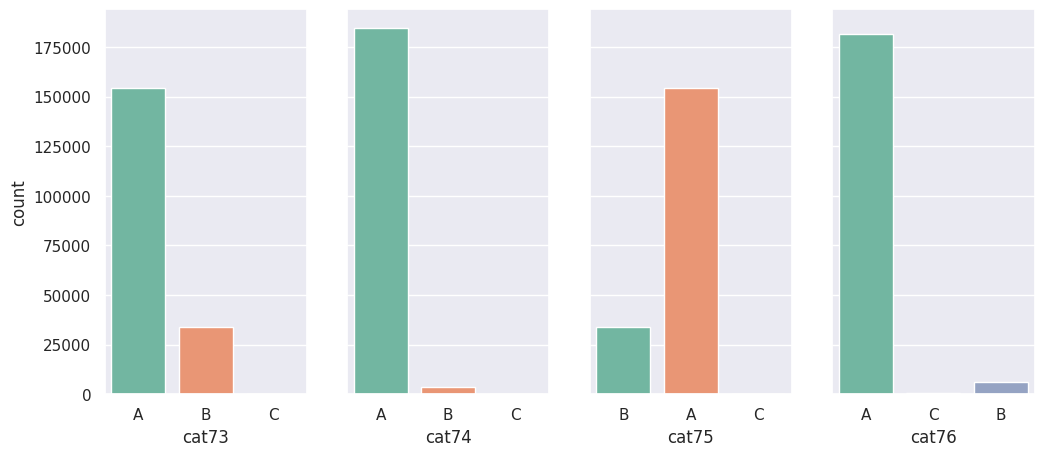

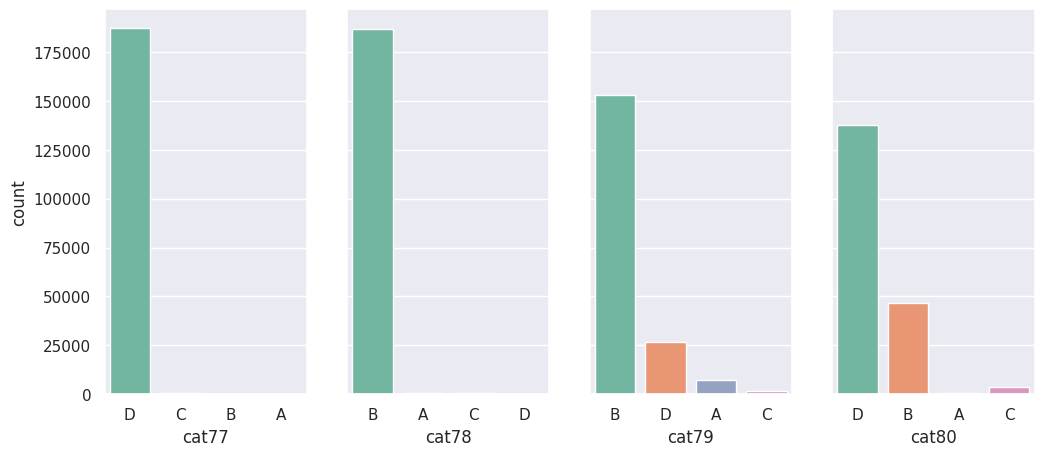

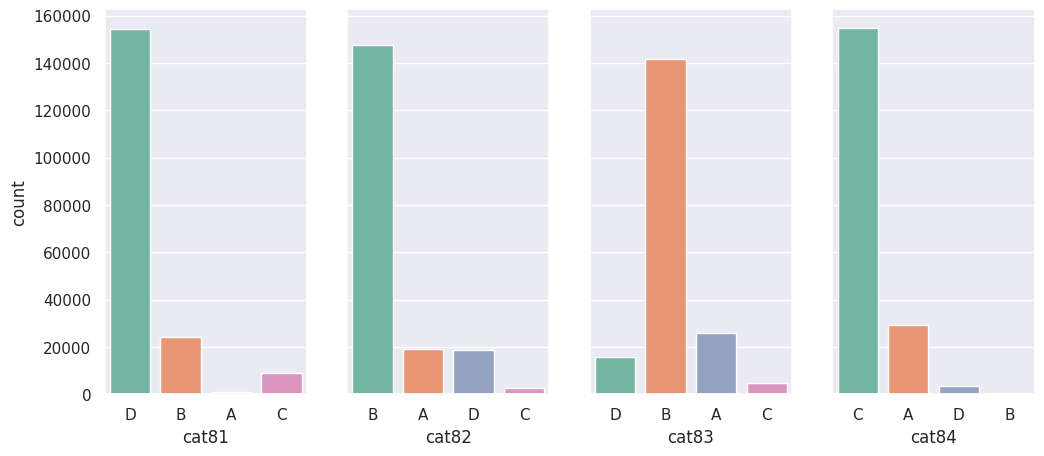

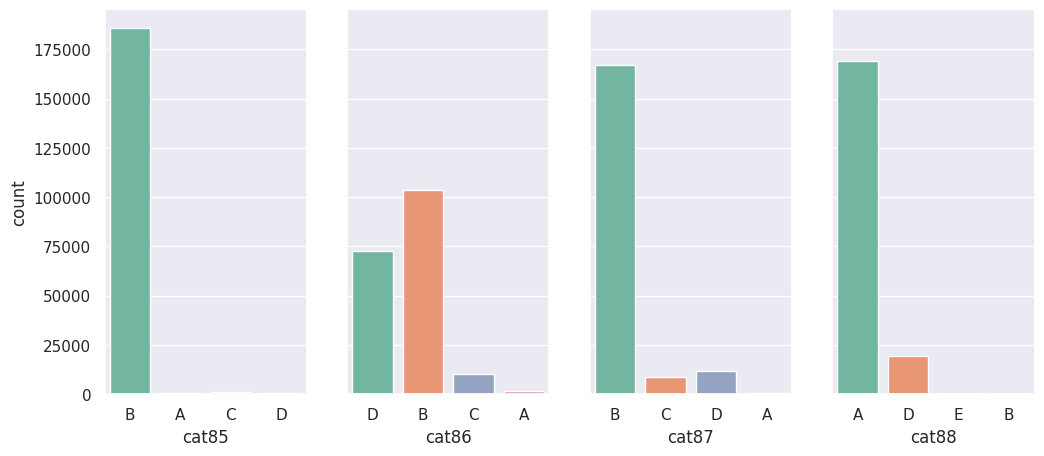

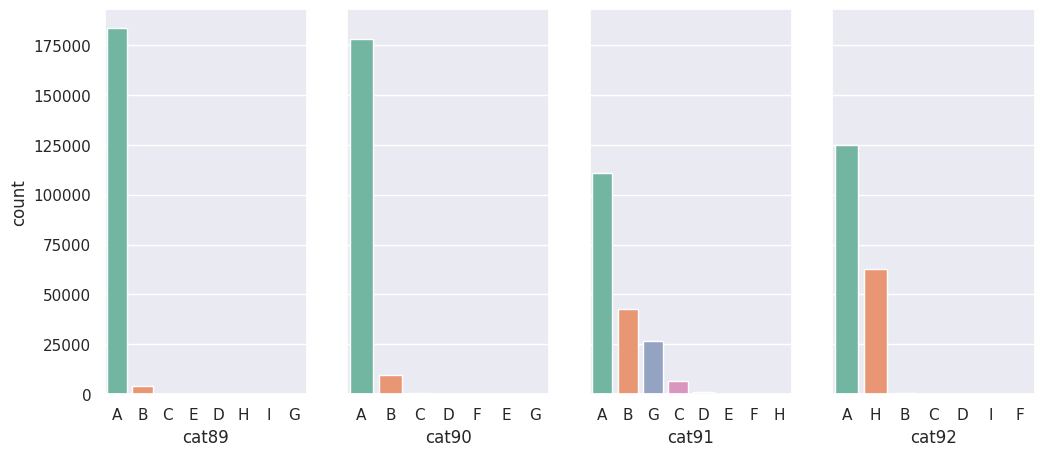

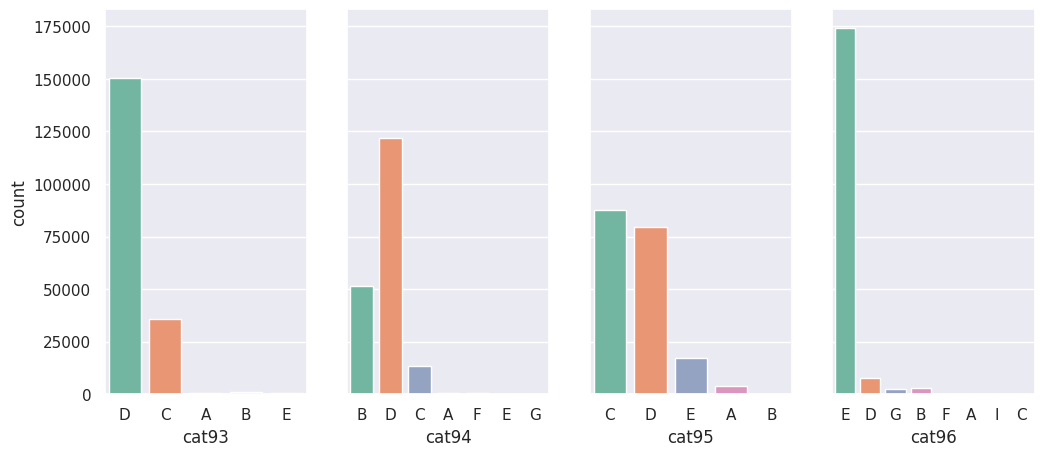

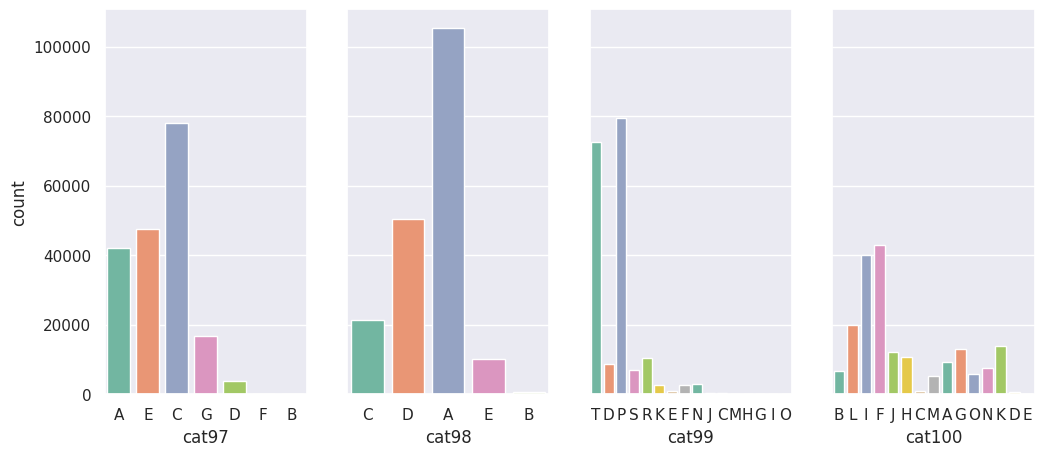

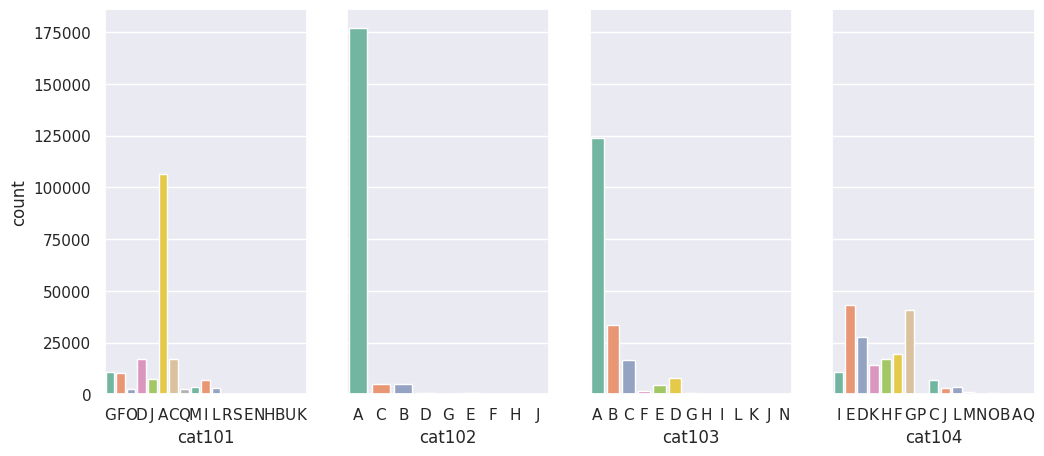

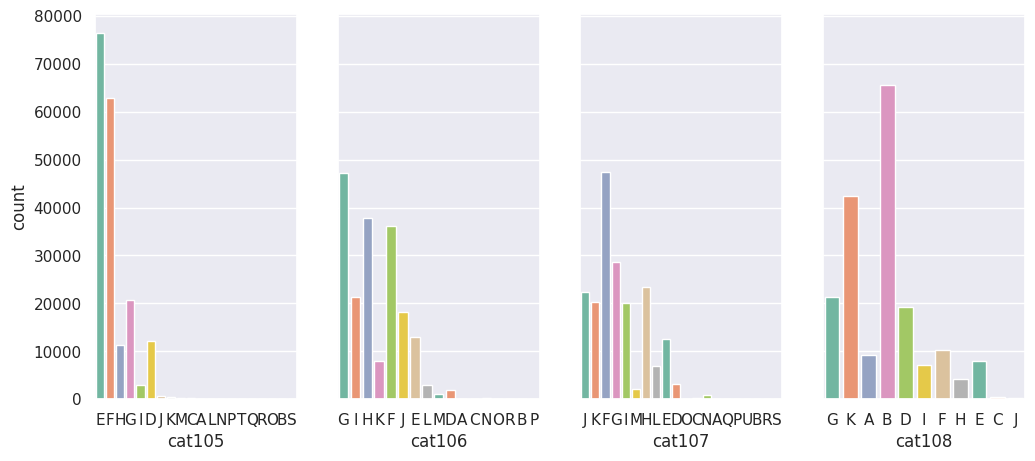

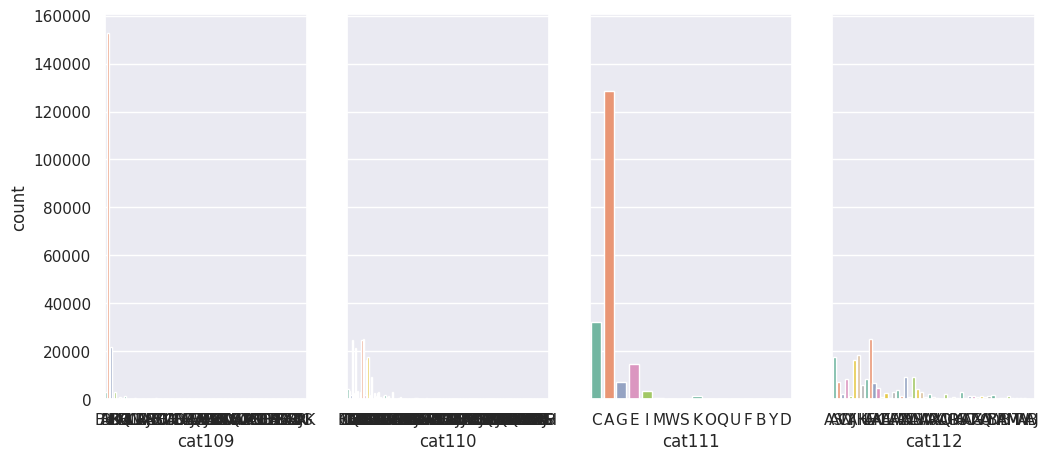

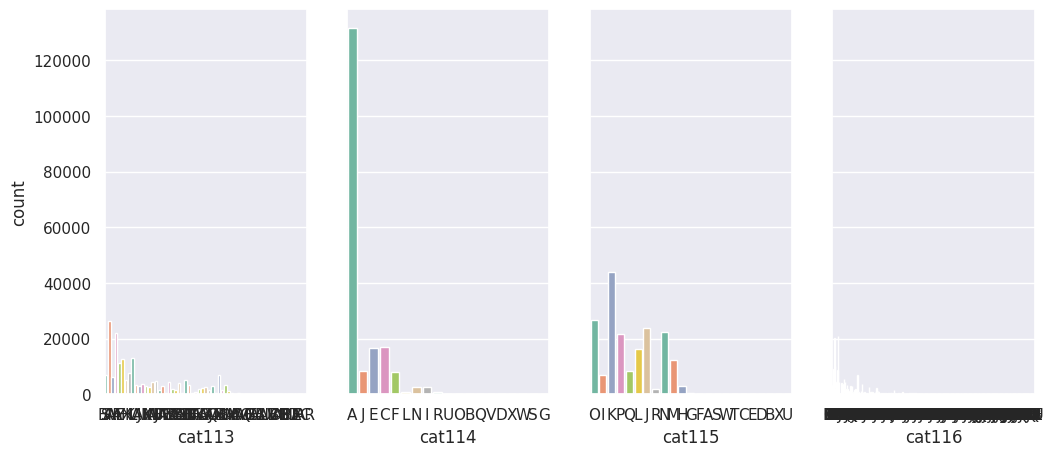

In [ ]:
n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 5))
    for j in range(n_cols):
        sns.countplot(x=cat_features[i*n_cols+j], data=df_train, ax=ax[j],palette='Set2')

- Hầu hết các cột category đều sẽ có 1 nhãn chiếm phần lớn dữ liệu so với các nhãn còn lại

## Data Preprocessing

In [ ]:
df_train.drop(['cont1','cont11','cont10'],axis=1,inplace=True)

In [ ]:
# One-Hot Encoding
df_train_encoded = pd.get_dummies(df_train, drop_first=False)

In [ ]:
counts_categorical_1 = []
cont_features_1 = []
cat_features_1 = []
for i in df_train_encoded.columns: # counting the number of categorical and continous features
    if 'cat' in i:
        #categorical_features_count += 1
        counts_categorical_1.append(len(df_train_encoded[i].value_counts()))  # counting the number of classes for each variable
        cat_features_1.append(i)
    elif 'cont' in i:
        #continous_features_count += 1
        cont_features_1.append(i)

print('Total categorical features:', len(cat_features_1))

Total categorical features: 1139


In [ ]:
# Loại bỏ các đặc trưng có biến thiên < 0.01
selector = VarianceThreshold(threshold=0.01)
train_new = selector.fit_transform(df_train_encoded)

df_train_new = pd.DataFrame(train_new, columns=df_train_encoded.columns[selector.get_support()])

In [ ]:
counts_categorical_1 = []
cont_features_1 = []
cat_features_1 = []
for i in df_train_new.columns: # counting the number of categorical and continous features
    if 'cat' in i:
        #categorical_features_count += 1
        counts_categorical_1.append(len(df_train_new[i].value_counts()))  # counting the number of classes for each variable
        cat_features_1.append(i)
    elif 'cont' in i:
        #continous_features_count += 1
        cont_features_1.append(i)

print('Total categorical features:', len(cat_features_1))
print('Total continuous features:', len(cont_features_1))

Total categorical features: 355
Total continuous features: 11


## Build Model

### Linear Regression

In [ ]:
# Define custom MAE function for log-transformed data
def evaluate_predictions(log_act, log_pred):
    """
    Calculates the MAE for predictions made on a natural log scale.
    log_act: the log transformed actual observations
    log_pred: the log transformed predictions

    Returns the inverse transformed MAE
    """
    inverse_pred = np.expm1(log_pred)  # Convert log predictions back to original scale
    inverse_act = np.expm1(log_act)    # Convert log actual values back to original scale
    return mean_absolute_error(inverse_act, inverse_pred)

# Preprocessing: Extract features and target variable
X = df_train_new.drop(columns=['id', 'loss'])  # Drop 'id' and target 'loss'
y = df_train_new['loss']  # Target variable

# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for the model with Linear Regression
model = Pipeline(steps=[
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_test)

# Evaluate the model using the custom MAE function on log-transformed data
mae = evaluate_predictions(y_test, y_pred)
print(f'Mean Absolute Error (MAE) on original scale: {mae}')

Mean Absolute Error (MAE) on original scale: 1244.9211005431994


### Lasso Regression

In [ ]:
# Define custom MAE function for log-transformed data
def evaluate_predictions(log_act, log_pred):
    inverse_pred = np.expm1(log_pred)  # Convert log predictions back to original scale
    inverse_act = np.expm1(log_act)    # Convert log actual values back to original scale
    return mean_absolute_error(inverse_act, inverse_pred)

# Preprocessing: Extract features and target variable
X = df_train_new.drop(columns=['id', 'loss'])  # Drop 'id' and target 'loss'
y = df_train_new['loss']  # Target variable

# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for the model with Lasso Regression
model = Pipeline(steps=[
    ('regressor', Lasso(alpha=0.1))  # Lasso Regression with regularization strength alpha
])

# Define parameter grid for alpha
param_grid = {'regressor__alpha': [0.01, 0.05, 0.1, 1.0]}  # Various values for alpha

# Set up GridSearchCV for cross-validation and hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=5)  # 5-fold cross-validation

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model using the custom MAE function on log-transformed data
mae = evaluate_predictions(y_test, y_pred)
print(f'Mean Absolute Error (MAE) on original scale: {mae}')

# Output the best hyperparameter (alpha) and the best score
print(f'Best Alpha: {grid_search.best_params_["regressor__alpha"]}')

Mean Absolute Error (MAE) on original scale: 1327.0010262733877
Best Alpha: 0.01


### Ridge Regression

In [ ]:
# Define custom MAE function for log-transformed data
def evaluate_predictions(log_act, log_pred):
    inverse_pred = np.expm1(log_pred)  # Convert log predictions back to original scale
    inverse_act = np.expm1(log_act)    # Convert log actual values back to original scale
    return mean_absolute_error(inverse_act, inverse_pred)

# Preprocessing: Extract features and target variable
X = df_train_new.drop(columns=['id', 'loss'])  # Drop 'id' and target 'loss'
y = df_train_new['loss']  # Target variable

# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for the model with Ridge Regression
model = Pipeline(steps=[
    ('regressor', Ridge())  # Initialize Ridge Regression (without alpha specified yet)
])

# Define parameter grid for alpha
param_grid = {'regressor__alpha': [0.01, 0.1, 1.0, 10.0]}  # Various values for alpha

# Set up GridSearchCV for cross-validation and hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=5)  # 5-fold cross-validation

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model using the custom MAE function on log-transformed data
mae = evaluate_predictions(y_test, y_pred)
print(f'Mean Absolute Error (MAE) on original scale: {mae}')

# Output the best hyperparameter (alpha) and the best score
print(f'Best Alpha: {grid_search.best_params_["regressor__alpha"]}')

Mean Absolute Error (MAE) on original scale: 1244.9164154901357
Best Alpha: 1.0


### Elastic Net

In [ ]:
# Define custom MAE function for log-transformed data
def evaluate_predictions(log_act, log_pred):
    inverse_pred = np.expm1(log_pred)  # Convert log predictions back to original scale
    inverse_act = np.expm1(log_act)    # Convert log actual values back to original scale
    return mean_absolute_error(inverse_act, inverse_pred)

# Preprocessing: Extract features and target variable
X = df_train_new.drop(columns=['id', 'loss'])  # Drop 'id' and target 'loss'
y = df_train_new['loss']  # Target variable

# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for the model with ElasticNet Regression
model = Pipeline(steps=[
    ('regressor', ElasticNet())  # Initialize ElasticNet Regression (without alpha or l1_ratio specified yet)
])

# Define parameter grid for alpha and l1_ratio
param_grid = {
    'regressor__alpha': [0.01, 0.1, 1.0, 10.0],  # Different values for alpha
    'regressor__l1_ratio': [0.1, 0.5, 0.7, 1.0]  # Different values for l1_ratio
}

# Set up GridSearchCV for cross-validation and hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=5)  # 5-fold cross-validation

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model using the custom MAE function on log-transformed data
mae = evaluate_predictions(y_test, y_pred)
print(f'Mean Absolute Error (MAE) on original scale: {mae}')

# Output the best hyperparameters (alpha, l1_ratio) and the best score
print(f'Best Alpha: {grid_search.best_params_["regressor__alpha"]}')
print(f'Best L1 Ratio: {grid_search.best_params_["regressor__l1_ratio"]}')

Mean Absolute Error (MAE) on original scale: 1249.2478949992753
Best Alpha: 0.01
Best L1 Ratio: 0.1


### Feature Importance

In [ ]:
# Preprocessing: Extract features and target variable
X = df_train_new.drop(columns=['id', 'loss'])  # Drop 'id' and target 'loss'
y = df_train_new['loss']  # Target variable

# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get feature importance (coefficients)
importance = model.coef_

# Create a DataFrame to display the feature names and their corresponding importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Sort the features by their importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

In [ ]:
threshold = 0.01
important_features = feature_importance[feature_importance['Importance'] > threshold]

# Lọc X chỉ với các đặc trưng quan trọng
X_important = X[important_features['Feature']]

# In ra số lượng đặc trưng còn lại
print(f"Số lượng đặc trưng quan trọng: {X_important.shape[1]}")

Số lượng đặc trưng quan trọng: 145


In [ ]:
# In ra tên các đặc trưng còn lại
print("\nCác đặc trưng quan trọng (tầm quan trọng > 0.01):")
print(important_features['Feature'].tolist())


Các đặc trưng quan trọng (tầm quan trọng > 0.01):
['cat95_E', 'cat98_D', 'cat95_C', 'cat95_A', 'cat80_B', 'cat98_A', 'cat101_J', 'cat101_I', 'cat81_B', 'cat81_C', 'cat80_C', 'cont2', 'cat87_D', 'cat87_C', 'cont7', 'cat101_F', 'cat101_M', 'cat101_L', 'cat57_B', 'cat5_B', 'cat101_G', 'cat86_B', 'cont3', 'cat101_Q', 'cat100_G', 'cat6_B', 'cont14', 'cat100_L', 'cat4_B', 'cat113_AT', 'cat101_O', 'cat87_B', 'cat94_C', 'cat94_D', 'cat79_D', 'cat112_AH', 'cat100_H', 'cat94_B', 'cont6', 'cat12_B', 'cat81_D', 'cat100_M', 'cat100_F', 'cat112_AF', 'cat112_G', 'cat93_C', 'cat101_D', 'cont9', 'cat53_B', 'cat26_B', 'cat98_C', 'cat93_D', 'cat39_A', 'cat101_C', 'cont8', 'cat44_B', 'cat99_T', 'cat99_P', 'cat31_A', 'cat41_A', 'cat112_E', 'cat113_BN', 'cat98_E', 'cat108_F', 'cat40_A', 'cat100_O', 'cat54_A', 'cat90_B', 'cat100_K', 'cat1_A', 'cat116_GK', 'cat110_AI', 'cat72_B', 'cat82_C', 'cat113_H', 'cat96_G', 'cat25_B', 'cat107_M', 'cat116_LB', 'cat8_B', 'cat50_A', 'cat45_A', 'cat27_B', 'cat110_EB', 'cat

In [ ]:
features = ['cat95_E', 'cat98_D', 'cat95_C', 'cat95_A', 'cat80_B', 'cat98_A', 'cat101_J', 'cat101_I', 'cat81_B', 'cat81_C', 'cat80_C', 'cont2', 'cat87_D', 'cat87_C', 'cont7', 'cat101_F', 'cat101_M', 'cat101_L', 'cat57_B', 'cat5_B', 'cat101_G', 'cat86_B', 'cont3', 'cat101_Q', 'cat100_G', 'cat6_B', 'cont14', 'cat100_L', 'cat4_B', 'cat113_AT', 'cat101_O', 'cat87_B', 'cat94_C', 'cat94_D', 'cat79_D', 'cat112_AH', 'cat100_H', 'cat94_B', 'cont6', 'cat12_B', 'cat81_D', 'cat100_M', 'cat100_F', 'cat112_AF', 'cat112_G', 'cat93_C', 'cat101_D', 'cont9', 'cat53_B', 'cat26_B', 'cat98_C', 'cat93_D', 'cat39_A', 'cat101_C', 'cont8', 'cat44_B', 'cat99_T', 'cat99_P', 'cat31_A', 'cat41_A', 'cat112_E', 'cat113_BN', 'cat98_E', 'cat108_F', 'cat40_A', 'cat100_O', 'cat54_A', 'cat90_B', 'cat100_K', 'cat1_A', 'cat116_GK', 'cat110_AI', 'cat72_B', 'cat82_C', 'cat113_H', 'cat96_G', 'cat25_B', 'cat107_M', 'cat116_LB', 'cat8_B', 'cat50_A', 'cat45_A', 'cat27_B', 'cat110_EB', 'cat43_A', 'cat38_B', 'cat13_B', 'cat97_E', 'cat96_B', 'cat11_B', 'cat100_N', 'cat113_AN', 'cat100_B', 'cat110_W', 'cat80_D', 'cat116_CR', 'cat10_B', 'cat116_HB', 'cat24_A', 'cat83_C', 'cat66_A', 'cat112_AN', 'cat116_HJ', 'cat110_DW', 'cat112_K', 'cat108_G', 'cat28_A', 'cat112_C', 'cont13', 'cat96_D', 'cat116_DP', 'cat116_CK', 'cat113_AG', 'cat116_GS', 'cat109_BU', 'cat97_D', 'cat82_B', 'cat16_A', 'cat2_B', 'cat110_AC', 'cat112_AW', 'cat71_B', 'cat106_D', 'cat107_L', 'cat3_B', 'cat97_G', 'cat37_B', 'cat110_CO', 'cat30_A', 'cat7_B', 'cat36_A', 'cat116_DJ', 'cat116_HG', 'cat110_BT', 'cat110_BS', 'cat95_D', 'cat97_C', 'cat82_A', 'cat116_LM', 'cat96_E', 'cat29_B', 'cat116_LO', 'cat92_H', 'cat113_J', 'cat14_A']
df_filtered = df_train_new[features]

### XGBoost

In [ ]:
# Define custom MAE function for log-transformed data
def evaluate_predictions(log_act, log_pred):
    inverse_pred = np.expm1(log_pred)  # Convert log predictions back to original scale
    inverse_act = np.expm1(log_act)    # Convert log actual values back to original scale
    return mean_absolute_error(inverse_act, inverse_pred)

# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(df_filtered, y, test_size=0.2, random_state=42)

# Create a pipeline for the model with XGBoost Regressor
model = Pipeline(steps=[
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror'))  # Using XGBoost Regressor with default parameters
])

# Define parameter grid for XGBoost hyperparameters
param_grid = {
    'regressor__n_estimators': [100,200,300],  # Number of boosting rounds
    'regressor__learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage to prevent overfitting
    'regressor__max_depth': [3, 5, 7],  # Maximum depth of a tree
    'regressor__subsample': [0.7, 0.8, 1.0],  # Subsample ratio of the training instance
    'regressor__colsample_bytree': [0.7, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
}

# Set up GridSearchCV for cross-validation and hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=3)  # 3-fold cross-validation

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model using the custom MAE function on log-transformed data
mae = evaluate_predictions(y_test, y_pred)
print(f'Mean Absolute Error (MAE) on original scale: {mae}')

# Output the best hyperparameters and the best MAE score
print(f'Best Hyperparameters: {grid_search.best_params_}')

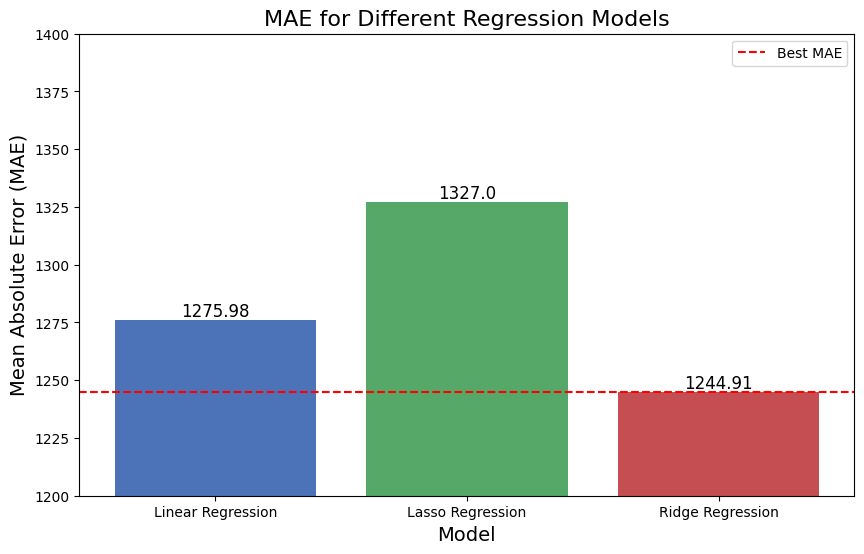

In [ ]:
import matplotlib.pyplot as plt

# Dữ liệu
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']
mae_values = [1275.98, 1327.00, 1244.91]

# Tạo biểu đồ cột với màu sắc gradient
plt.figure(figsize=(10, 6))
colors = ['#4C72B8', '#55A868', '#C44E52']  # Màu sắc đẹp hơn

bars = plt.bar(models, mae_values, color=colors)
plt.title('MAE for Different Regression Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=14)
plt.ylim(1200, 1400)  # Thiết lập giới hạn cho trục y để dễ quan sát
plt.axhline(y=min(mae_values), color='red', linestyle='--', label='Best MAE')
plt.legend()

# Thêm chỉ số lên các cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.show()